<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/4_%D0%9C%D0%B5%D1%85%D0%B0%D0%BD%D0%B8%D0%B7%D0%BC_%D0%B2%D0%BD%D0%B8%D0%BC%D0%B0%D0%BD%D0%B8%D1%8F_(Attention_Mechanism).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.Механизм внимания (Attention Mechanism)

#### Введение

Механизм внимания (Attention Mechanism) является ключевым компонентом современных архитектур нейронных сетей, таких как трансформеры, и нашел широкое применение в задачах обработки естественного языка (NLP), компьютерного зрения, а также других областях. Механизм внимания позволяет моделям фокусироваться на наиболее важных частях входных данных, адаптируя весовые коэффициенты для различных частей информации в зависимости от их важности. В этой лекции мы подробно рассмотрим математическое описание механизма внимания, начиная с базовых принципов.

#### 1. Основные элементы механизма внимания

Механизм внимания включает три ключевые компонента:

1. **Запросы (Queries, Q)** — представляют собой векторы, описывающие, на что модель хочет обратить внимание.
2. **Ключи (Keys, K)** — это векторы, с которыми сравниваются запросы для определения важности различных элементов.
3. **Значения (Values, V)** — это векторы, которые содержат информацию, соответствующую каждому ключу.

Для каждого запроса внимание вычисляется как взвешенная сумма значений, где веса определяются сходством между запросом и ключом. Формально:

$$
\text{Attention}(Q, K, V) = \sum_{i} \alpha_i V_i
$$

где $\alpha_i$ — это веса, определяющие, насколько элемент $V_i$ важен для данного запроса $Q$.

#### 2. Операция масштабированного скалярного произведения внимания (Scaled Dot-Product Attention)

Часто внимание вычисляется через скалярное произведение между запросом и ключом, нормированное по размерности векторов, чтобы избежать чрезмерно больших значений, которые могут привести к числовой нестабильности:

$$
\alpha_i = \frac{\exp(\text{score}(Q, K_i))}{\sum_{j} \exp(\text{score}(Q, K_j))}
$$

где $\text{score}(Q, K_i)$ — это скалярное произведение запроса и ключа:

$$
\text{score}(Q, K_i) = \frac{Q \cdot K_i}{\sqrt{d_k}}
$$

Здесь $d_k$ — это размерность ключей (или запросов), которая используется для масштабирования. Таким образом, итоговая формула внимания принимает вид:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

Разберем эту формулу шаг за шагом.

#### 3. Шаг 1: Вычисление сходства запросов и ключей

Первый шаг в механизме внимания — это вычисление сходства (score) между каждым запросом $Q$ и каждым ключом $K_i$ при помощи скалярного произведения:

$$
\text{score}(Q, K_i) = Q \cdot K_i
$$

В матричной форме для всего набора запросов и ключей это записывается как:

$$
S = QK^T
$$

где $S$ — это матрица сходств между запросами и ключами. Если $Q \in \mathbb{R}^{n \times d_k}$ и $K \in \mathbb{R}^{m \times d_k}$, то $S \in \mathbb{R}^{n \times m}$.

#### 4. Шаг 2: Масштабирование и нормализация

Чтобы значения сходств не становились слишком большими при увеличении размерности $d_k$, результат скалярного произведения масштабируется на $\frac{1}{\sqrt{d_k}}$:

$$
S_{\text{scaled}} = \frac{S}{\sqrt{d_k}}
$$

Затем к каждому элементу этой матрицы применяется функция softmax, чтобы преобразовать их в вероятности, суммирующиеся до единицы:

$$
\alpha_{ij} = \frac{\exp(S_{\text{scaled}, ij})}{\sum_{k} \exp(S_{\text{scaled}, ik})}
$$

где $\alpha_{ij}$ — это коэффициенты внимания, указывающие, насколько важен элемент $j$-й вектор значения $V_j$ для $i$-го запроса $Q_i$.

#### 5. Шаг 3: Взвешенная сумма значений

Используя полученные коэффициенты внимания $\alpha_{ij}$, рассчитывается взвешенная сумма значений $V$, чтобы получить итоговое представление для каждого запроса:

$$
\text{Attention}(Q, K, V)_i = \sum_{j} \alpha_{ij} V_j
$$

В матричной форме это записывается как:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

где результат — это матрица размерности $n \times d_v$, где $n$ — количество запросов, а $d_v$ — размерность значений.

#### 6. Многоголовое внимание (Multi-Head Attention)

Чтобы модель могла одновременно сосредотачиваться на разных аспектах входных данных, используется многоголовое внимание (Multi-Head Attention). Это позволяет механизму внимания обучаться извлекать различную информацию на разных "головах". Каждая голова имеет свои параметры для запросов, ключей и значений.

Формально, многоголовое внимание вычисляется следующим образом:

1. Запросы, ключи и значения сначала линейно преобразуются с помощью различных матриц весов:

$$
Q_h = QW_h^Q, \quad K_h = KW_h^K, \quad V_h = VW_h^V
$$

где $W_h^Q$, $W_h^K$, $W_h^V$ — это матрицы весов для $h$-й головы.

2. Для каждой головы применяется механизм внимания:

$$
\text{Attention}_h = \text{Attention}(Q_h, K_h, V_h)
$$

3. Результаты для всех голов конкатенируются и снова преобразуются с помощью линейного слоя:

$$
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{Attention}_1, \dots, \text{Attention}_h)W^O
$$

где $W^O$ — это матрица весов для итогового линейного преобразования.

#### 7. Итоговая формула многоголового внимания

Итоговая формула для многоголового внимания:

$$
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \dots, \text{head}_h)W^O
$$

где каждая $\text{head}_i$ вычисляется как:

$$
\text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)
$$




Давайте рассмотрим конкретный числовой пример, чтобы проиллюстрировать математический механизм внимания. В этом примере будет один запрос (Q), три ключа (K), и три соответствующих значения (V).

### Данные:
- Размерность запросов, ключей и значений $d_k = 2$.
- Векторы запросов (Q), ключей (K) и значений (V) заданы следующим образом:

$$
Q = \begin{pmatrix} 1 \\ 0 \end{pmatrix}
$$

$$
K_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad K_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}, \quad K_3 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

$$
V_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad V_2 = \begin{pmatrix} 0 \\ 2 \end{pmatrix}, \quad V_3 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

Задача — вычислить итоговое внимание.

### Шаг 1: Вычисление сходств (скалярных произведений) между запросом и ключами

Для каждого ключа вычислим скалярное произведение с запросом $Q$:

$$
\text{score}(Q, K_1) = Q \cdot K_1 = 1 \cdot 1 + 0 \cdot 0 = 1
$$

$$
\text{score}(Q, K_2) = Q \cdot K_2 = 1 \cdot 0 + 0 \cdot 1 = 0
$$

$$
\text{score}(Q, K_3) = Q \cdot K_3 = 1 \cdot 1 + 0 \cdot 1 = 1
$$

Таким образом, матрица сходств (S) будет:

$$
S = \begin{pmatrix} 1 & 0 & 1 \end{pmatrix}
$$

### Шаг 2: Масштабирование и применение softmax

Теперь масштабируем сходства на $\sqrt{d_k} = \sqrt{2}$:

$$
S_{\text{scaled}} = \frac{S}{\sqrt{2}} = \begin{pmatrix} \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} \end{pmatrix} \approx \begin{pmatrix} 0.707 & 0 & 0.707 \end{pmatrix}
$$

Применяем softmax, чтобы нормализовать значения:

$$
\alpha_i = \frac{\exp(S_{\text{scaled}, i})}{\sum_{j=1}^{3} \exp(S_{\text{scaled}, j})}
$$

Вычислим численные значения:

$$
\alpha_1 = \frac{\exp(0.707)}{\exp(0.707) + \exp(0) + \exp(0.707)} \approx \frac{2.028}{2.028 + 1 + 2.028} \approx 0.407
$$

$$
\alpha_2 = \frac{\exp(0)}{\exp(0.707) + \exp(0) + \exp(0.707)} \approx \frac{1}{2.028 + 1 + 2.028} \approx 0.201
$$

$$
\alpha_3 = \frac{\exp(0.707)}{\exp(0.707) + \exp(0) + \exp(0.707)} \approx 0.407
$$

Итак, коэффициенты внимания для каждого ключа:

$$
\alpha_1 \approx 0.407, \quad \alpha_2 \approx 0.201, \quad \alpha_3 \approx 0.407
$$

### Шаг 3: Взвешенная сумма значений

Теперь вычислим итоговое внимание как взвешенную сумму значений:

$$
\text{Attention}(Q, K, V) = \alpha_1 V_1 + \alpha_2 V_2 + \alpha_3 V_3
$$

$$
\text{Attention}(Q, K, V) \approx 0.407 \begin{pmatrix} 1 \\ 0 \end{pmatrix} + 0.201 \begin{pmatrix} 0 \\ 2 \end{pmatrix} + 0.407 \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

Теперь посчитаем поэлементно:

$$
\text{Attention}(Q, K, V)_x = 0.407 \cdot 1 + 0.201 \cdot 0 + 0.407 \cdot 1 \approx 0.407 + 0 + 0.407 = 0.814
$$

$$
\text{Attention}(Q, K, V)_y = 0.407 \cdot 0 + 0.201 \cdot 2 + 0.407 \cdot 1 \approx 0 + 0.402 + 0.407 = 0.809
$$

Итак, итоговый вектор внимания:

$$
\text{Attention}(Q, K, V) \approx \begin{pmatrix} 0.814 \\ 0.809 \end{pmatrix}
$$

Таким образом, итоговое внимание для данного примера получилось $\begin{pmatrix} 0.814 \\ 0.809 \end{pmatrix}$. Этот вектор является результатом взвешенной суммы значений $V_1$, $V_2$, $V_3$, где веса зависят от скалярного произведения запросов и ключей, нормированных через softmax.


Скалярные произведения (scores): [1 0 1]
Коэффициенты внимания (weights): [0.40111209 0.19777581 0.40111209]
Результат внимания (Attention output): [0.80222419 0.79666372]


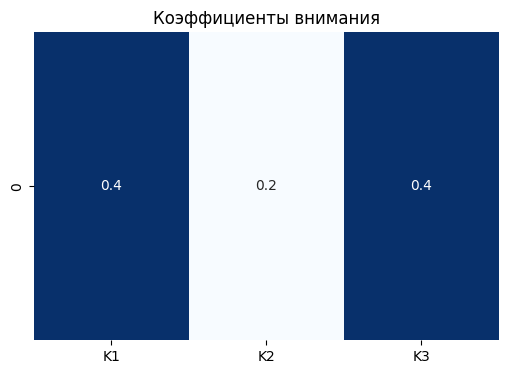

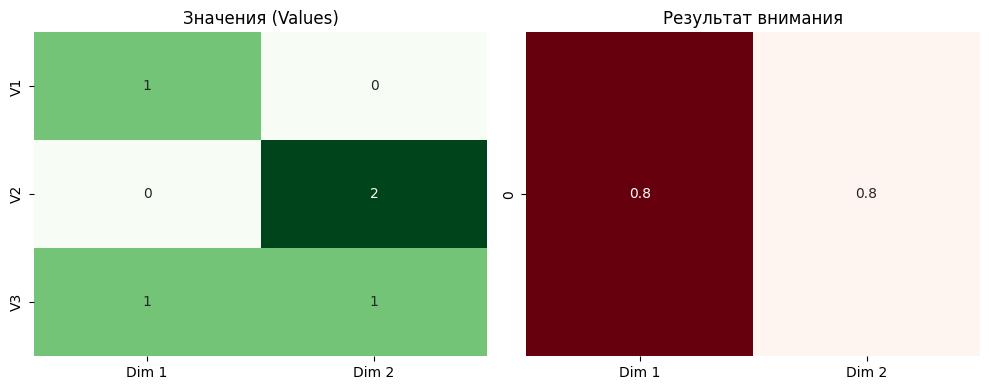

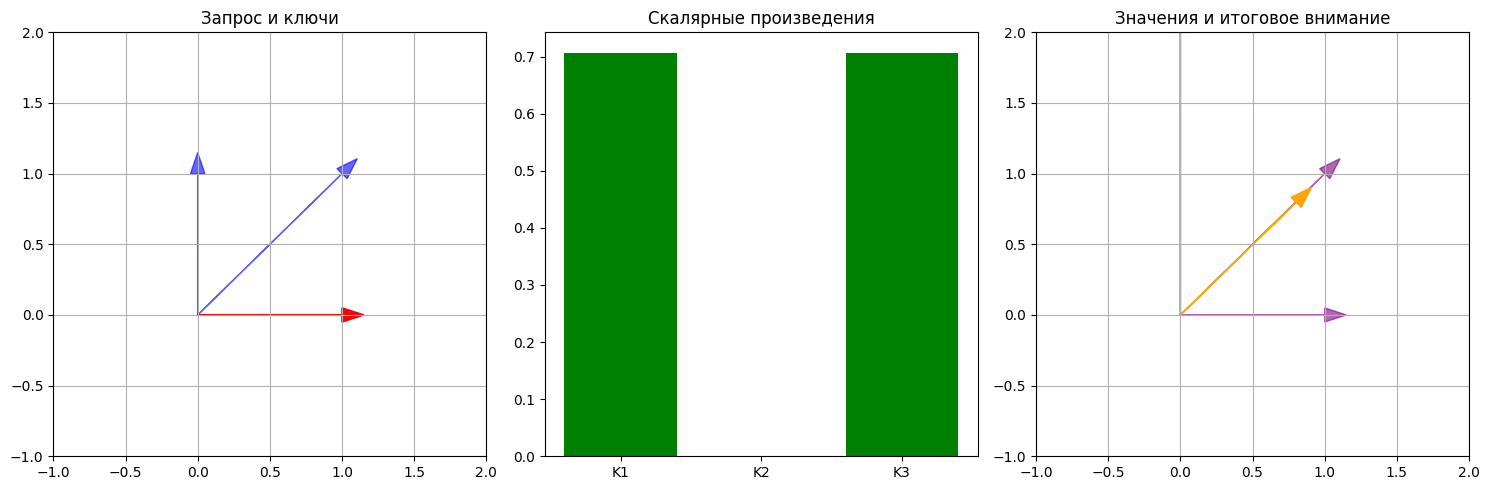

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Заданные данные
Q = np.array([1, 0])
K = np.array([[1, 0], [0, 1], [1, 1]])
V = np.array([[1, 0], [0, 2], [1, 1]])

# Шаг 1: Вычисление сходств (скалярные произведения между Q и K)
scores = np.dot(K, Q)
print("Скалярные произведения (scores):", scores)

# Шаг 2: Масштабирование и softmax
d_k = Q.shape[0]  # Размерность ключей и запросов
scaled_scores = scores / np.sqrt(d_k)

# Применение softmax
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

attention_weights = softmax(scaled_scores)
print("Коэффициенты внимания (weights):", attention_weights)

# Шаг 3: Взвешенная сумма значений
attention_output = np.dot(attention_weights, V)
print("Результат внимания (Attention output):", attention_output)

# Визуализация весов внимания
plt.figure(figsize=(6, 4))
sns.heatmap(attention_weights.reshape(1, -1), annot=True, cmap="Blues", cbar=False, xticklabels=['K1', 'K2', 'K3'])
plt.title("Коэффициенты внимания")
plt.show()

# Визуализация значений и результатов внимания
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Исходные значения
sns.heatmap(V, annot=True, cmap="Greens", cbar=False, ax=ax[0])
ax[0].set_title("Значения (Values)")
ax[0].set_xticklabels(['Dim 1', 'Dim 2'])
ax[0].set_yticklabels(['V1', 'V2', 'V3'])

# Результат внимания
sns.heatmap(attention_output.reshape(1, -1), annot=True, cmap="Reds", cbar=False, ax=ax[1])
ax[1].set_title("Результат внимания")
ax[1].set_xticklabels(['Dim 1', 'Dim 2'])

plt.tight_layout()
plt.show()

# Визуализация
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Визуализация ключей и запроса
ax[0].set_title('Запрос и ключи')
for i in range(K.shape[0]):
    ax[0].arrow(0, 0, K[i, 0], K[i, 1], head_width=0.1, color='blue', alpha=0.6)
ax[0].arrow(0, 0, Q[0], Q[1], head_width=0.1, color='red')
ax[0].set_xlim(-1, 2)
ax[0].set_ylim(-1, 2)
ax[0].grid(True)

# Визуализация сходств (скалярные произведения)
ax[1].bar(['K1', 'K2', 'K3'], scaled_scores, color='green')
ax[1].set_title('Скалярные произведения')

# Визуализация значений и итогового внимания
ax[2].set_title('Значения и итоговое внимание')
for i in range(V.shape[0]):
    ax[2].arrow(0, 0, V[i, 0], V[i, 1], head_width=0.1, color='purple', alpha=0.6)
ax[2].arrow(0, 0, attention_output[0], attention_output[1], head_width=0.1, color='orange')
ax[2].set_xlim(-1, 2)
ax[2].set_ylim(-1, 2)
ax[2].grid(True)

plt.tight_layout()
plt.show()

#### Заключение

Механизм внимания — это мощный инструмент для фокусировки на наиболее важных элементах входных данных. Его основная сила заключается в вычислении взвешенных сумм значений, где веса определяются скалярными произведениями между запросами и ключами. Многоголовое внимание позволяет модели извлекать разные аспекты информации, что делает его основным элементом таких архитектур, как трансформеры.



### Вопросы для самопроверки

1. Что такое механизм внимания (Attention Mechanism)?
2. Для чего используется механизм внимания в NLP и других задачах машинного обучения?
3. Как происходит процесс вычисления скалярного произведения между запросом (Query) и ключом (Key)?
4. Что означает масштабирование скалярных произведений в механизме внимания и почему оно необходимо?
5. Как вычисляется коэффициент внимания с использованием softmax?
6. Каковы основные шаги в вычислении механизма внимания?
7. Что такое запрос (Query), ключ (Key) и значение (Value) в контексте механизма внимания?
8. Почему необходимо применять softmax после вычисления сходств между запросом и ключами?
9. В чем заключается разница между «вниманием на основе контекста» и «самовниманием» (self-attention)?
10. Какой размерности должны быть векторы запросов, ключей и значений?
11. Почему результатом работы механизма внимания является взвешенная сумма значений?
12. Как влияют коэффициенты внимания на итоговую взвешенную сумму значений?
13. В чем математическая суть механизма внимания в трансформерах?
14. Как масштабирование по $\sqrt{d_k}$ влияет на вычисление скалярных произведений?
15. Каковы преимущества использования механизма внимания в задачах машинного перевода и генерации текста?



###Задачи для самостоятельной работы

1. Даны векторы запросов $Q = \begin{pmatrix} 2 \\ 1 \end{pmatrix}$, ключей $K_1 = \begin{pmatrix} 2 \\ 0 \end{pmatrix}$, $K_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$, $K_3 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$. Найдите скалярные произведения и коэффициенты внимания для этих ключей.
2. Вычислите итоговое внимание, если коэффициенты внимания равны $0.5, 0.3, 0.2$ и значения $V_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$, $V_2 = \begin{pmatrix} 2 \\ 1 \end{pmatrix}$, $V_3 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$.
3. Дано $d_k = 3$, найдите масштабированные скалярные произведения для запросов $Q = \begin{pmatrix} 3 \\ 2 \\ 1 \end{pmatrix}$ и ключей $K_1, K_2, K_3$ (ключи задайте самостоятельно).
4. Для ключей $K = \begin{pmatrix} 2 & 3 \\ 1 & 0 \end{pmatrix}$ и запроса $Q = \begin{pmatrix} 3 \\ 1 \end{pmatrix}$, найдите итоговое значение внимания.
5. Найдите коэффициенты внимания и итоговое внимание для векторов запросов, ключей и значений произвольной размерности.
6. Даны три ключа и один запрос, рассчитайте сходства и коэффициенты внимания вручную, используя softmax.
7. Докажите, что сумма всех коэффициентов внимания всегда равна 1.
8. Упростите и вычислите итоговое внимание при $Q = \begin{pmatrix} 4 \\ 0 \end{pmatrix}$, $K_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$, $K_2 = \begin{pmatrix} 0 \\ 4 \end{pmatrix}$, $V_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$, $V_2 = \begin{pmatrix} 0 \\ 2 \end{pmatrix}$.
9. Измените размерность $d_k$ и исследуйте, как она влияет на итоговые коэффициенты внимания и взвешенную сумму значений.
10. Для задачи с $d_k = 2$ и случайными значениями запросов, ключей и значений найдите результат внимания при различных масштабированиях.
11. Изучите поведение коэффициентов внимания при одинаковых значениях для всех ключей и различных значениях запросов.
12. Рассчитайте итоговое внимание для случая, когда значения всех векторов запросов, ключей и значений — одинаковые.
13. Программно реализуйте механизм внимания для случайно сгенерированных ключей, значений и запросов размерности $d_k = 3$.
14. Вычислите внимание для многомерных запросов, ключей и значений, используя механизм матричных операций.
15. Для данных $Q = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$, $K_1 = \begin{pmatrix} 3 \\ 2 \end{pmatrix}$, $V_1 = \begin{pmatrix} 0 \\ 2 \end{pmatrix}$, найдите итоговое внимание при различных функциях активации.
16. Постройте график зависимости коэффициентов внимания от значений скалярных произведений при разных $d_k$.
17. Сравните вычисления внимания при использовании разных нормализаций скалярных произведений (например, без масштабирования, с масштабированием).
18. Найдите результат внимания для случая, когда векторы запросов и ключей содержат отрицательные значения.
19. Визуализируйте процесс изменения коэффициентов внимания при увеличении количества ключей и значений.
20. Реализуйте многоголовочное внимание (Multi-Head Attention) и сравните результат с одноголовочным вниманием для одного запроса.
21. Для трех ключей и значений разной размерности найдите итоговое внимание и постройте график зависимости значений от коэффициентов внимания.
22. В случае, когда коэффициенты внимания равны $\alpha_1 = 0.25, \alpha_2 = 0.5, \alpha_3 = 0.25$, найдите итоговое внимание для значений произвольной размерности.
23. Опишите и рассчитайте механизм внимания для случайных векторов ключей, запросов и значений с использованием NumPy и визуализируйте результат.
24. Вычислите внимание для 4 ключей и одного запроса, если каждый вектор запроса и ключа имеет размерность $d_k = 5$.
25. Программно смоделируйте механизм внимания для различных размерностей и посчитайте влияние масштаба $\sqrt{d_k}$ на результаты.
26. Для случая, когда $Q = \begin{pmatrix} 2 \\ 1 \end{pmatrix}$, $K_1 = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$, $V_1 = \begin{pmatrix} 3 \\ 1 \end{pmatrix}$, посчитайте итоговое внимание при $\alpha_1 = 0.4$.
27. Рассчитайте внимание для случая, когда запрос состоит из двух компонент, а ключи и значения — из трех. Объясните результат.
28. Программно сгенерируйте наборы запросов, ключей и значений и вычислите механизмы внимания для различных размерностей и функций активации.
29. Постройте график зависимости результата внимания от изменения векторов значений $V$ при постоянных запросах и ключах.
30. Реализуйте задачу с вычислением механизма внимания для нескольких запросов и ключей и изучите поведение коэффициентов внимания при изменении числа запросов.
